In [34]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import Series
series = Series.from_csv('https://raw.githubusercontent.com/jaymahapatra/IST-718-Big-Data-Analytics-HW4/master/champagne.csv') 
print(series.head())
print(series.describe())
print(series.dtypes)

1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
dtype: int64
count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
dtype: float64
int64


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


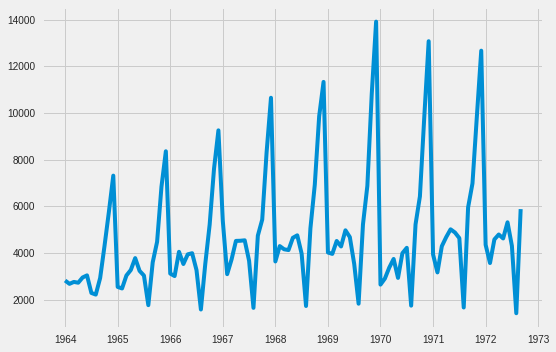

In [35]:
from matplotlib import pyplot
len(series)
series.plot()
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


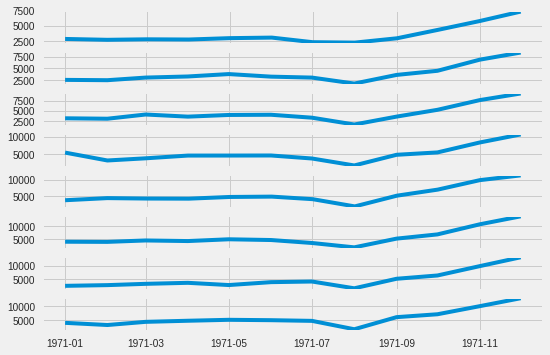

Empty DataFrame
Columns: []
Index: []


In [39]:
#groupby to look at one year over the next
from pandas import DataFrame
from pandas import TimeGrouper

groups = series['1964':'1971'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()
print(years)
print(groups)

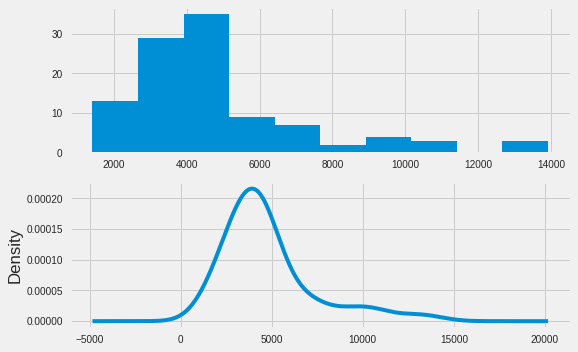

In [37]:
#look at density or distribution of sales over temporal period/consider doing this for each year/ then consider transformation
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


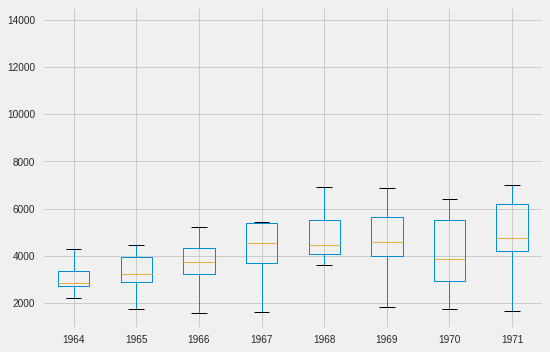

    1964  1965  1966   1967   1968   1969   1970   1971
0   2815  2541  3113   5375   3633   4016   2639   3934
1   2672  2475  3006   3088   4292   3957   2899   3162
2   2755  3031  4047   3718   4154   4510   3370   4286
3   2721  3266  3523   4514   4121   4276   3740   4676
4   2946  3776  3937   4520   4647   4968   2927   5010
5   3036  3230  3986   4539   4753   4677   3986   4874
6   2282  3028  3260   3663   3965   3523   4217   4633
7   2212  1759  1573   1643   1723   1821   1738   1659
8   2922  3595  3528   4739   5048   5222   5221   5951
9   4301  4474  5211   5428   6922   6872   6424   6981
10  5764  6838  7614   8314   9858  10803   9842   9851
11  7312  8357  9254  10651  11331  13916  13076  12670


In [40]:
groups = series['1964':'1971'].groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()
print(years)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF Statistic: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


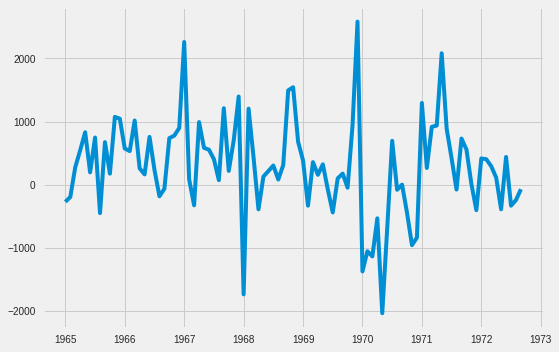

In [41]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

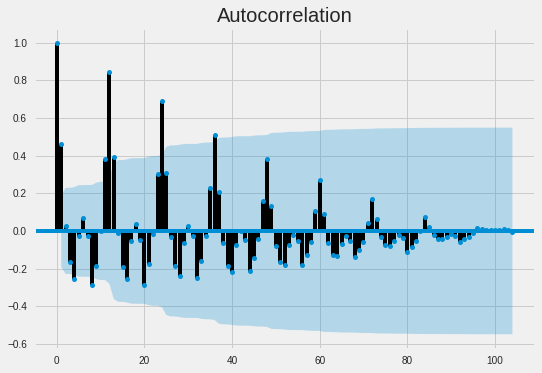

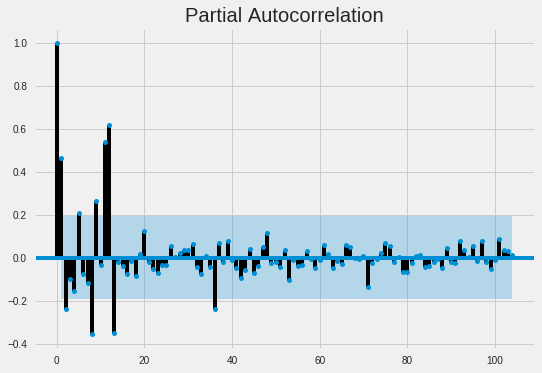

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



plot_acf(series, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(series, ax=pyplot.gca())
pyplot.show()